Импортирование библиотек

In [1]:
import pandas as pd 
import xgboost as xgb 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

Загрузка датасета

In [2]:
train = pd.read_csv('cleanedTrain.csv') 
valid = pd.read_csv('cleanedValid.csv') 

Подготовка данных

In [3]:
x_train = train.drop(columns=['target'])  # Признаки 
y_train = train['target']  # Целевая переменная 

x_valid = valid.drop(columns=['target'])  # Признаки 
y_valid = valid['target']  # Целевая переменная


# x_train - признаки, которые будет предсказывать модель
# y_train - представляет собой целевую переменную, на которой будет учиться модель
# аналогично с x_valid и y_valid

Обучение модели

In [4]:
# Обучение модели с гиперпараметрами 
model = xgb.XGBClassifier( 
    eval_metric='logloss', 
    learning_rate=0.1,  # Скорость обучения 
    max_depth=6,        # Максимальная глубина дерева 
    n_estimators=100,   # Количество деревьев 
    subsample=0.8,      # Доля выборки для обучения 
    colsample_bytree=0.8,  # Доля признаков для каждого дерева 
    gamma=0,            # Минимальное уменьшение потерь для разделения 
    reg_alpha=0,        # L1-регуляризация 
    reg_lambda=1        # L2-регуляризация 
) 
 
model.fit(x_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Предсказание вероятности покупки 

In [5]:
# Предсказание вероятности покупки 
pred = model.predict_proba(x_valid)[:, 1]  # Вероятность покупки 

print("Модель обучена.") 
print(roc_auc_score(y_valid, pred)) # Оценка точности метрикой ROC AUC

Модель обучена.
0.8101802420174904


Вывод графиков

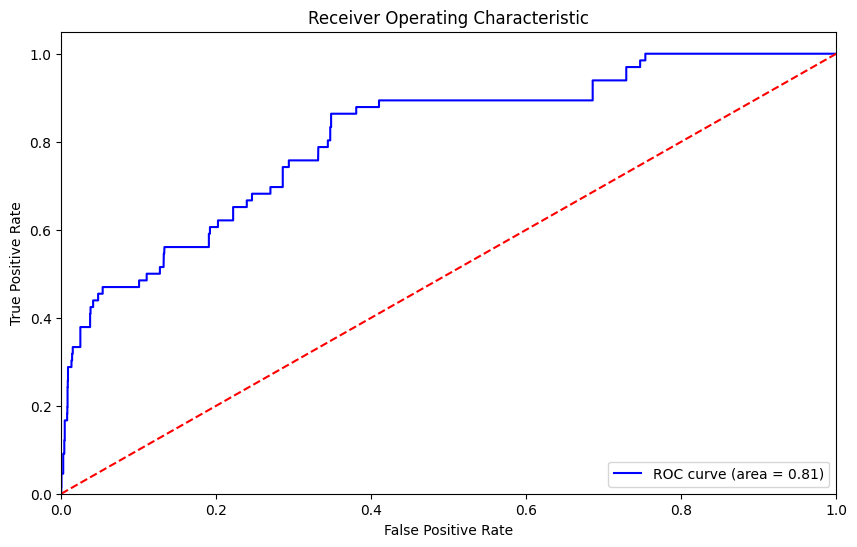

In [6]:
fpr, tpr, thresholds = roc_curve(y_valid, pred)

plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(y_valid, pred)) 
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic') 
plt.legend(loc='lower right') 
plt.show() 


<Figure size 1000x600 with 0 Axes>

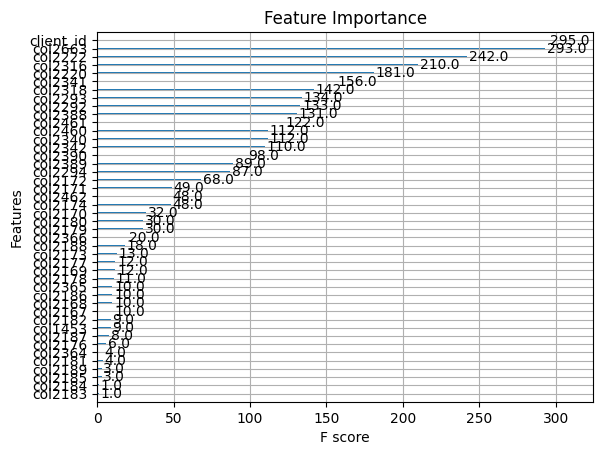

In [7]:
# Визуализация важности признаков 
plt.figure(figsize=(10, 6)) 
xgb.plot_importance(model, importance_type='weight') 
plt.title('Feature Importance') 
plt.show()